In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv('reviews_filtered.csv')

In [3]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,YSUcHqlKMPHHJ_cTrqtNrA,0,2017-12-29 13:55:19,0,E6B-2U2sGG3xgmnNWZAEew,1,Came here on a Thursday night at 6:30 p.m. My ...,0,DbccYu3OppWKl21OanZnTg
1,sMzNLdhJZGzYirIWt-fMAg,0,2015-06-21 00:59:14,0,RLbWoIri29BcQ8yjzsvQLQ,5,This place epitomizes the rumored transformati...,0,_o740mSNRhMNYuPjSJoPLg
2,EgwGTDZ705TwudPJwAY0yQ,0,2011-01-09 00:07:16,0,W6VRRz7mVGZLsidyHelHwg,5,This place is quite possibly my favorite resta...,2,To4ATBBNlnC5gzj0dwXfuA
3,r5PLDU-4mSbde5XekTXSCA,0,2013-01-27 17:54:54,0,lDJIaF4eYRF4F7g6Zb9euw,4,I used to work food service and my manager at ...,2,lb0QUR5bc4O-Am4hNq9ZGg
4,JN6287XepTV2wOiwnq5joA,0,2011-02-13 16:59:31,0,miAbIuIln8YfLoo6rf3MyQ,3,Visited this restaurant after a 3 hour drive t...,0,7-Wb8rDEymidPPfShLX3Yg


In [4]:
reviews.loc[0, 'text']

"Came here on a Thursday night at 6:30 p.m. My friends and I had a reservation, but it was not needed - the place was almost empty.\n\nSERVICE: Extremely Poor\n\nWhile I enjoyed the company of my friends, I would not come back to this restaurant, primarily because of the poor service. Once we were all seated, we were not greeted by anyone for over half an hour, and when someone did come by, we asked whether we could place our orders, to which he said he could not; he's doing something else - so we waited at least another 15 minutes before someone came to finally take our orders. \n\nMAIN: Caprese Salad\n\nThe salad was okay - a bit salty for my liking. I personally did not find this dish filling, so I ordered the sweet potato fries as well (See below).\n\nMAIN: Sweet Potato Fries (this was worth it) \n\nThese fries were actually very delicious - crispy on the outside and soft on the inside. If you visit this restaurant, I would recommend this particular dish, especially given the price

In [5]:
reviews.loc[1, 'text']

'This place epitomizes the rumored transformation that is in the process of taking place in Pittsburgh. Great food, drinks, and service, but the atmosphere is second to none. Definitely a must visit for locals and visitors alike! You will not feel like you\'re in "Pittsburgh".'

In [6]:
reviews['stars'].describe()

count    102545.000000
mean          3.713589
std           1.394087
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64

In [7]:
star_counts = reviews['stars'].value_counts()

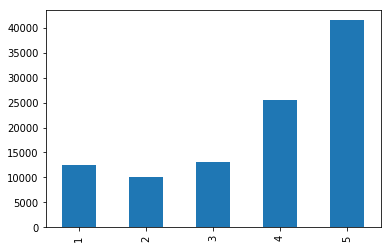

In [8]:
star_counts.sort_index().plot(kind='bar')

In [9]:
good_review_text = reviews.loc[reviews['stars'] == 5, 'text']
bad_review_text = reviews.loc[reviews['stars'] < 4, 'text']

In [10]:
good_review_text.shape

(41453,)

In [11]:
bad_review_text.shape

(35659,)

In [12]:
good_review_text = good_review_text.iloc[:1000].str.lower()
bad_review_text = bad_review_text.iloc[:1000].str.lower()

In [13]:
good_review_text.head()

1     this place epitomizes the rumored transformati...
2     this place is quite possibly my favorite resta...
6     awesome food and service! really wish we had o...
9     what can you say about this place that hasn't ...
14    the best pizza in las vegas. the people workin...
Name: text, dtype: object

In [14]:
bad_review_text.head()

0     came here on a thursday night at 6:30 p.m. my ...
4     visited this restaurant after a 3 hour drive t...
5     you take the good, you take the bad, you take ...
7     believe the negative reviews. i came here afte...
10    when.she told me that the oven is 2,000 degree...
Name: text, dtype: object

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [16]:
good_text = ' '.join(review for review in good_review_text)
bad_text = ' '.join(review for review in bad_review_text)

In [17]:
good_wordcloud = WordCloud(max_words=50).generate(good_text)

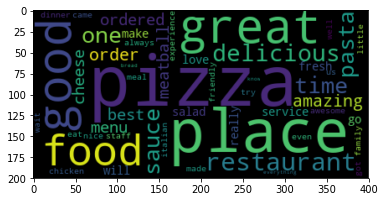

In [18]:
plt.imshow(good_wordcloud, interpolation='bilinear')

In [19]:
good_wordcloud.to_file('./top_review_words.png')

In [20]:
bad_wordcloud = WordCloud(max_words=50).generate(bad_text)

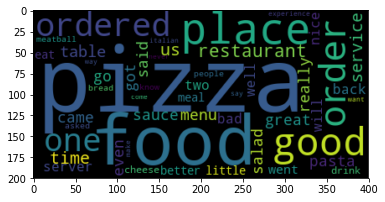

In [21]:
plt.imshow(bad_wordcloud, interpolation='bilinear')

In [22]:
bad_stopwords = set(['pizza', 'food', 'order', 'place'])

In [23]:
stopwords = set(STOPWORDS)
stopwords.update(bad_stopwords)

In [24]:
better_wordcloud = WordCloud(stopwords=stopwords, max_words=50).generate(good_text)

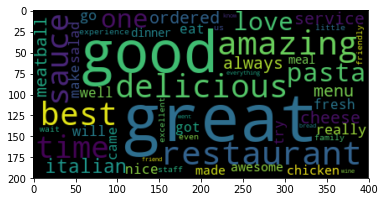

In [25]:
plt.imshow(better_wordcloud, interpolation='bilinear')